# Tools

In [1]:
#@title Installation
!pip install transformers
!pip install tensorflow-text==2.10.0
# !pip install -U tensorflow-text=='2.10.0b2 '
!pip install tqdm
!python -m spacy download en_core_web_lg #a trained pipeline
!pip install spacy-langdetect
!pip install contractions
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 49.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting un

In [2]:
#@title Load Dataset
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! mkdir Data

In [3]:
#@title import
import tensorflow as tf
from tensorflow import keras

import tensorflow_hub as hub


from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint

import time

import transformers
from transformers import ElectraTokenizer, TFElectraModel, TFBertModel

import sklearn 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import re
import string
import spacy
from spacy.tokenizer import Tokenizer
from spacy.language import Language
from spacy_langdetect import LanguageDetector
nlp = spacy.load('en_core_web_lg') # This will return a Language object containing all components and data needed to process text
stp_wds = nlp.Defaults.stop_words
tokenizer = nlp.tokenizer

from tqdm import tqdm

import contractions


# Data Preparation

In [4]:
#@title Cleaning text
def cleaner(text,low=True, punct=True, digit=True, emot=True, contrac=True, tag=True, stop_w=True, lemm=True, url=True, html=True, ent=True):


  #to_lower(self):
  if low:
    text = text.lower()

  # remove_tags:
  if tag:
    pattern = re.compile(r"@\w*")
    text =  pattern.sub('', text)  

  #remove_punct:
  if punct:
    text = text.translate(str.maketrans('', '', string.punctuation))
    '''The translate() method returns a string where some specified characters are replaced with the character described in a dictionary, or in a mapping table.
    Use the maketrans() method to create a mapping table.'''

  #remove_digit:
  if digit:
    pattern = re.compile(r"\d+")
    text = pattern.sub('', text) 


  #convert_emoticons:
  if emot:
    emoticons = {
    u":‑)":"Happy face or smiley",
    u":-))":"Very Happy face or smiley",
    u":-)))":"Very very Happy face or smiley",
    u":)":"Happy face or smiley",
    u":))":"Very Happy face or smiley",
    u":)))":"Very very Happy face or smiley",
    u":-]":"Happy face or smiley",
    u":]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-)":"Happy face smiley",
    u":o)":"Happy face smiley",
    u":-}":"Happy face smiley",
    u":}":"Happy face smiley",
    u":-)":"Happy face smiley",
    u":c)":"Happy face smiley",
    u":^)":"Happy face smiley",
    u"=]":"Happy face smiley",
    u"=)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B^D":"Laughing, big grin or laugh with glasses",
    u":-))":"Very happy",
    u":-(":"Frown, sad, angry or pouting",
    u":‑(":"Frown, sad, angry or pouting",
    u":(":"Frown, sad, angry or pouting",
    u":‑c":"Frown, sad, angry or pouting",
    u":c":"Frown, sad, angry or pouting",
    u":‑<":"Frown, sad, angry or pouting",
    u":<":"Frown, sad, angry or pouting",
    u":‑[":"Frown, sad, angry or pouting",
    u":[":"Frown, sad, angry or pouting",
    u":-||":"Frown, sad, angry or pouting",
    u">:[":"Frown, sad, angry or pouting",
    u":{":"Frown, sad, angry or pouting",
    u":@":"Frown, sad, angry or pouting",
    u">:(":"Frown, sad, angry or pouting",
    u":'‑(":"Crying",
    u":'(":"Crying",
    u":'‑)":"Tears of happiness",
    u":')":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-*":"Kiss",
    u":*":"Kiss",
    u":X":"Kiss",
    u";‑)":"Wink or smirk",
    u";)":"Wink or smirk",
    u"*-)":"Wink or smirk",
    u"*)":"Wink or smirk",
    u";‑]":"Wink or smirk",
    u";]":"Wink or smirk",
    u";^)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑|":"Straight face",
    u":|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑)":"Angel, saint or innocent",
    u"O:)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑)":"Angel, saint or innocent",
    u"0:)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;^)":"Angel, saint or innocent",
    u">:‑)":"Evil or devilish",
    u">:)":"Evil or devilish",
    u"}:‑)":"Evil or devilish",
    u"}:)":"Evil or devilish",
    u"3:‑)":"Evil or devilish",
    u"3:)":"Evil or devilish",
    u">;)":"Evil or devilish",
    u"|;‑)":"Cool",
    u"|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑)":"Party all night",
    u"%‑)":"Drunk or confused",
    u"%)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑|":"Dump",
    u"(>_<)":"Troubled",
    u"(>_<)>":"Troubled",
    u"(';')":"Baby",
    u"(^^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(^_^;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(~_~;) (・.・;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-)zzz":"Sleeping",
    u"(^_-)":"Wink",
    u"((+_+))":"Confused",
    u"(+o+)":"Confused",
    u"(o|o)":"Ultraman",
    u"^_^":"Joyful",
    u"(^_^)/":"Joyful",
    u"(^O^)／":"Joyful",
    u"(^o^)／":"Joyful",
    u"(__)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_(._.)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<(_ _)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m(__)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(__)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(_ _)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"('_')":"Sad or Crying",
    u"(/_;)":"Sad or Crying",
    u"(T_T) (;_;)":"Sad or Crying",
    u"(;_;":"Sad of Crying",
    u"(;_:)":"Sad or Crying",
    u"(;O;)":"Sad or Crying",
    u"(:_;)":"Sad or Crying",
    u"(ToT)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q.Q":"Sad or Crying",
    u"T.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"(-.-)":"Shame",
    u"(-_-)":"Shame",
    u"(一一)":"Shame",
    u"(；一_一)":"Shame",
    u"(=_=)":"Tired",
    u"(=^·^=)":"cat",
    u"(=^··^=)":"cat",
    u"=_^= ":"cat",
    u"(..)":"Looking down",
    u"(._.)":"Looking down",
    u"^m^":"Giggling with hand covering mouth",
    u"(・・?":"Confusion",
    u"(?_?)":"Confusion",
    u">^_^<":"Normal Laugh",
    u"<^!^>":"Normal Laugh",
    u"^/^":"Normal Laugh",
    u"（*^_^*）" :"Normal Laugh",
    u"(^<^) (^.^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^.^)":"Normal Laugh",
    u"(^_^.)":"Normal Laugh",
    u"(^_^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^J^)":"Normal Laugh",
    u"(*^.^*)":"Normal Laugh",
    u"(^—^）":"Normal Laugh",
    u"(#^.^#)":"Normal Laugh",
    u"（^—^）":"Waving",
    u"(;_;)/~~~":"Waving",
    u"(^.^)/~~~":"Waving",
    u"(-_-)/~~~ ($··)/~~~":"Waving",
    u"(T_T)/~~~":"Waving",
    u"(ToT)/~~~":"Waving",
    u"(*^0^*)":"Excited",
    u"(*_*)":"Amazed",
    u"(*_*;":"Amazed",
    u"(+_+) (@_@)":"Amazed",
    u"(*^^)v":"Laughing,Cheerful",
    u"(^_^)v":"Laughing,Cheerful",
    u"((d[-_-]b))":"Headphones,Listening to music",
    u'(-"-)':"Worried",
    u"(ーー;)":"Worried",
    u"(^0_0^)":"Eyeglasses",
    u"(＾ｖ＾)":"Happy",
    u"(＾ｕ＾)":"Happy",
    u"(^)o(^)":"Happy",
    u"(^O^)":"Happy",
    u"(^o^)":"Happy",
    u")^o^(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o.O":"Surpised",
    u"(o.o)":"Surprised",
    u"oO":"Surprised",
    u"(*￣m￣)":"Dissatisfied",
    u"(‘A`)":"Snubbed or Deflated"
    }
    for emot in emoticons:
      new = text.replace(u'\('+emot+'\)', emoticons[emot])
    text = new

  #contraction:
  if contrac:
    text = contractions.fix(text)


  #remove_StopWords:
  if stop_w:
    words = [w.text for w in nlp(text) if w.text.lower not in stp_wds]
    text = " ".join(words)



  #lemmazition:
  if lemm:
    text = " ".join([w.lemma_ for w in nlp(text)])


  #remove_URL:
  if url:
    pattern = re.compile(r"http\w*")
    text = pattern.sub(r"", text)


  #remove_HTMLtags:
  if html:
    pattern = re.compile(r"<.*?>")
    text = pattern.sub(r'', text)

    

  #remove_namedEntities:
  if ent:
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    text = " ".join([ent.text for ent in doc if ent.text not in entities])

  # Remove trailing whitespace
  text = re.sub(r'\s+', ' ', text).strip()


  return tokenizer(text)


In [5]:
#@title remove non-english texts
def get_lang_detector(nlp, name):
    return LanguageDetector()

Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

def remove_non_english(data):
  for idx in data.index:
    sent = data.iloc[idx, 1]
    if nlp(sent)._.language['language'] != 'en':
      data_en = data.drop(idx, errors='ignore')
  return data_en

In [6]:
#@title Data_1
!kaggle datasets download -d gargmanas/sentimental-analysis-for-tweets
! unzip sentimental-analysis-for-tweets.zip -d Data

100% 476k/476k [00:00<00:00, 1.17MB/s]
100% 476k/476k [00:00<00:00, 1.17MB/s]
Archive:  sentimental-analysis-for-tweets.zip
  inflating: Data/sentiment_tweets3.csv  


In [7]:
data_1 = pd.read_csv('/content/Data/sentiment_tweets3.csv')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [8]:
data_1.rename({'label (depression result)':"label", "message to examine":"tweet"},axis=1, inplace=True)
data_11 = data_1[["tweet", "label"]]

In [9]:
data_1.head(5)

,Index,tweet,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [10]:
data_1['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [11]:
#@title Data_2
!kaggle datasets download -d parulpandey/emotion-dataset

100% 715k/715k [00:00<00:00, 1.54MB/s]
100% 715k/715k [00:00<00:00, 1.54MB/s]


In [12]:
!unzip emotion-dataset.zip -d Data

Archive:  emotion-dataset.zip
  inflating: Data/test.csv           
  inflating: Data/training.csv       
  inflating: Data/validation.csv     


In [13]:
data_2 = pd.read_csv('/content/Data/training.csv')

In [14]:
data_2.label.unique()

array([0, 3, 2, 5, 4, 1])

sadness (0), joy (1), love (2), anger (3), fear (4).

In [15]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [16]:
data_2['label'] = data_2['label'].apply(lambda sent: 1 if sent in [0,3,4,5] else 0)

In [17]:
data_2.rename({'text':'tweet'},axis=1,inplace=True)

In [18]:
data_2.head(5)

,tweet,label
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,0
4,i am feeling grouchy,1


In [19]:
data_2['label'].value_counts()

1    9334
0    6666
Name: label, dtype: int64

In [20]:
#@title Data_3
!kaggle datasets download -d pashupatigupta/emotion-detection-from-text
!unzip emotion-detection-from-text.zip -d Data

 64% 1.00M/1.56M [00:00<00:00, 1.98MB/s]
100% 1.56M/1.56M [00:00<00:00, 2.80MB/s]
Archive:  emotion-detection-from-text.zip
  inflating: Data/tweet_emotions.csv  


In [21]:
data_3 = pd.read_csv('/content/Data/tweet_emotions.csv')

In [22]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [23]:
data_3.rename({'sentiment':'label', 'content':'tweet'},axis=1, inplace=True)
data_3 = data_3[['tweet','label']]
data_3.head()

,tweet,label
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [24]:
data_3.label.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [25]:
data_3['label'] = data_3['label'].apply(lambda sent: 1 if sent in ['empty', 'sadness', 'worry', 'hate', 'boredom', 'anger'] else 0)

In [26]:
#@title Final Data
data = pd.concat([data_1, data_2, data_3])

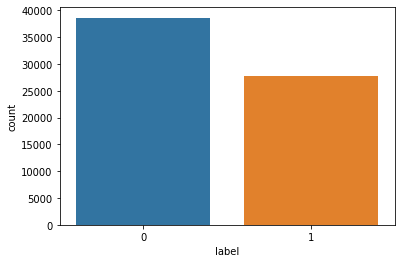

In [27]:
sns.countplot(x=data['label'])

In [28]:
data.label.value_counts()

0    38603
1    27711
Name: label, dtype: int64

In [29]:
data = data.sample(frac=1)
data.head(10)
# data.label.unique()

,Index,tweet,label
11472,NaN,Had a relaxing day at the park in the sun. Bac...,1
30519,NaN,oo. and studied today outside after having a b...,0
3058,NaN,i get the feeling you may think this is an att...,0
30841,NaN,@misshilarypaige i will HAVE to agree w/ u,0
11227,NaN,i just remember feeling frantic desperately tr...,1
3964,401679.0,reminder: it is a very good idea to stay on th...,0
32608,NaN,im determined to slarm around my house and eat...,0
9239,NaN,i am floating in the flashback feeling the hea...,0
10287,NaN,@cfuess is making me hungry. i had a bowl of ...,0
7654,NaN,i have trouble not focusing on it not feeling ...,1


In [30]:
data.drop(['Index'],axis=1,inplace=True)

In [31]:
data.tweet.astype(str)

11472    Had a relaxing day at the park in the sun. Bac...
30519    oo. and studied today outside after having a b...
3058     i get the feeling you may think this is an att...
30841           @misshilarypaige i will HAVE to agree w/ u
11227    i just remember feeling frantic desperately tr...
                               ...                        
6516     i might be able to recreate the feeling when i...
13120    i just want people to leave me alone and not m...
15765                       i feel hot irritated and tired
17358    @Karetron I KNOW!!!! Its all stormy outside.. ...
283      @gerardway I can't waight  till the new albam ...
Name: tweet, Length: 66314, dtype: object

In [32]:
data['cleaned_tweet'] = data['tweet'].apply(cleaner)

In [33]:
data.tail(10)

,tweet,label,cleaned_tweet
693,god i cant even catch public transport. swine ...,1,"(god, I, can, not, even, catch, public, transp..."
1140,"@LauraRepetti i tested on an old shirt first, ...",0,"(I, test, on, an, old, shirt, which, be, good,..."
25881,I'm out looking for warblers! Seen a yellow so...,0,"(I, be, out, look, for, warbler, see, a, yello..."
7153,"weekend with my cuzzo Vivi, I can't stand to h...",0,"(weekend, with, my, cuzzo, vivi, I, can, not, ..."
6736,@mintygibberish: Hey me! Hey you! Hey us! Th...,0,"(hey, I, hey, you, hey, we, thank, you, see, y..."
6516,i might be able to recreate the feeling when i...,1,"(I, might, be, able, to, recreate, the, feelin..."
13120,i just want people to leave me alone and not m...,1,"(I, just, want, people, to, leave, I, alone, a..."
15765,i feel hot irritated and tired,0,"(I, feel, hot, irritated, and, tired)"
17358,@Karetron I KNOW!!!! Its all stormy outside.. ...,0,"(I, know, its, all, stormy, outside, and, my, ..."
283,@gerardway I can't waight till the new albam ...,0,"(I, can, not, waight, till, the, new, albam, b..."


In [34]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from wordcloud import WordCloud

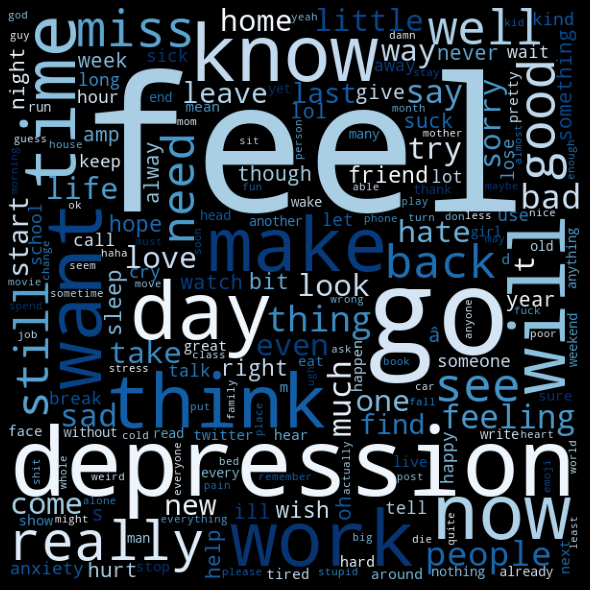

In [36]:
negative_words = ' '.join(word.text for word in (data[data['label'] == 1]['cleaned_tweet']))
negative_wc = WordCloud(width = 600,height = 600, collocations=False, colormap="Blues").generate(negative_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(negative_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

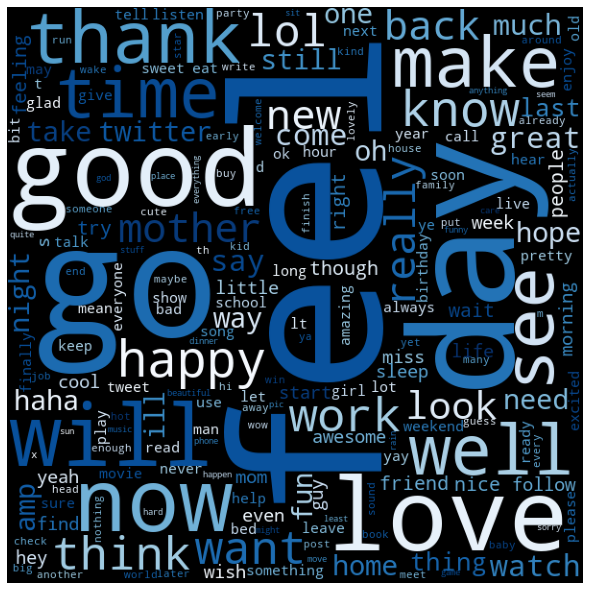

In [37]:
positive_words = ' '.join(word.text for word in (data[data['label'] == 0]['cleaned_tweet']))
positive_wc = WordCloud(width = 600,height = 600, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.imshow(positive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [38]:
# removing confusing words
pronouns = ['she', 'you', 'they', 'mine', 'yours', 'his', 'hers', 'its', 'ours', 'theirs', 'that, which, who, whom, whose', 'this', 'that', 'these', 'those', 'who', 'whom', 'whose', 'what']
def remove_confusing_words(text):
    text = ' '.join(word.text for word in text if word.text not in ['amp', 'tweet', 'lol', 'day', 'got', 'yet', 'twitter', 'and'] and word.text not in pronouns and len(word) > 2)
    return text

data['cleaned_text'] = list(data.cleaned_tweet.map(lambda sent : remove_confusing_words(sent)))

In [39]:
data.head()

,tweet,label,cleaned_tweet,cleaned_text
11472,Had a relaxing day at the park in the sun. Bac...,1,"(have, a, relaxing, day, at, the, park, in, th...",have relaxing the park the sun back work
30519,oo. and studied today outside after having a b...,0,"(oo, and, study, outside, after, have, a, wear...",study outside after have wear sundress hopeful...
3058,i get the feeling you may think this is an att...,0,"(I, get, the, feeling, you, may, think, this, ...",get the feeling may think attraction thing par...
30841,@misshilarypaige i will HAVE to agree w/ u,0,"(I, will, have, to, agree, w, you)",will have agree
11227,i just remember feeling frantic desperately tr...,1,"(I, just, remember, feel, frantic, desperately...",just remember feel frantic desperately try say...


In [40]:
x_train,  x_test, y_train, y_test = train_test_split(data['cleaned_text'], data.label, test_size=0.2)

In [41]:
print(x_train)

34317    good morning very happy mother all lovely mom ...
8386     happy with the news comeback feel agitated wit...
25526    thank for view portfolio wwwwahliaocom ill upd...
31241             have very good lot stretch sleep the sun
19766    justin warm make worry when have high fever sleep
                               ...                        
9871                           take forum access away fail
4213     leave off cos needa stay back for meeting for ...
5027                 miss sooo much the way hello everyone
12625                    lookd soo freak outpoor wee thing
1881     see mis myonlysanction ugh jealous sucker for ...
Name: cleaned_text, Length: 53051, dtype: object


# Build the Model

In [42]:
import tensorflow_text as tf_txt

In [43]:
preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [44]:
# defining 2 input layers for input_ids and attn_masks
# input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
# attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
bert_inputs = preprocess(text_input)
bert_embeds = bert(bert_inputs)

conv = tf.keras.layers.Conv1D(5, 10, padding='same')(bert_embeds['sequence_output'])
pool = tf.keras.layers.MaxPool1D()(conv)


dense = tf.keras.layers.Dense(256, activation = 'relu')(pool)

batch_layer = tf.keras.layers.BatchNormalization()(dense)

dense_2 = tf.keras.layers.Dense(256, activation = 'relu')(dense)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(dense_2)

sentiment_model = tf.keras.Model(inputs=[text_input], outputs=output_layer)

sentiment_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [45]:
optim = tf.keras.optimizers.Adam(learning_rate=3e-5) 
loss_func = tf.keras.losses.BinaryCrossentropy()
metrics = tf.keras.metrics.BinaryAccuracy()

In [46]:
Name = "sentiment_analysis{}".format(int(time.time()))

In [47]:
tensorboard_callback = TensorBoard(log_dir='logs/{}'.format(Name))

In [48]:
checkpoint_filepath = './Checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = False,
    monitor = 'val_BinaryAccuracy',
    mode = 'max',
    save_best_only = True)

In [49]:
sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=metrics)

In [50]:
sentiment_model.fit(
    x_train,
    y_train,
    validation_data=(x_test,y_test),
    shuffle=True,
    batch_size=16,
    epochs=8,
    callbacks=[model_checkpoint_callback,tensorboard_callback])

Epoch 1/8
3316/3316 [==============================] - ETA: 0s - loss: 0.5361 - binary_accuracy: 0.7325

3316/3316 [==============================] - 697s 205ms/step - loss: 0.5361 - binary_accuracy: 0.7325 - val_loss: 0.5178 - val_binary_accuracy: 0.7475
Epoch 2/8
3316/3316 [==============================] - ETA: 0s - loss: 0.5143 - binary_accuracy: 0.7492

3316/3316 [==============================] - 666s 201ms/step - loss: 0.5143 - binary_accuracy: 0.7492 - val_loss: 0.5166 - val_binary_accuracy: 0.7484
Epoch 3/8
3316/3316 [==============================] - ETA: 0s - loss: 0.5085 - binary_accuracy: 0.7534

3316/3316 [==============================] - 676s 204ms/step - loss: 0.5085 - binary_accuracy: 0.7534 - val_loss: 0.5129 - val_binary_accuracy: 0.7484
Epoch 4/8
3316/3316 [==============================] - ETA: 0s - loss: 0.5046 - binary_accuracy: 0.7550

3316/3316 [==============================] - 676s 204ms/step - loss: 0.5046 - binary_accuracy: 0.7550 - val_loss: 0.5068 - val_binary_accuracy: 0.7541
Epoch 5/8
3316/3316 [==============================] - ETA: 0s - loss: 0.5016 - binary_accuracy: 0.7561

3316/3316 [==============================] - 676s 204ms/step - loss: 0.5016 - binary_accuracy: 0.7561 - val_loss: 0.5046 - val_binary_accuracy: 0.7551
Epoch 6/8
3316/3316 [==============================] - ETA: 0s - loss: 0.4991 - binary_accuracy: 0.7573

3316/3316 [==============================] - 677s 204ms/step - loss: 0.4991 - binary_accuracy: 0.7573 - val_loss: 0.5050 - val_binary_accuracy: 0.7552
Epoch 7/8
3316/3316 [==============================] - ETA: 0s - loss: 0.4971 - binary_accuracy: 0.7579

3316/3316 [==============================] - 675s 204ms/step - loss: 0.4971 - binary_accuracy: 0.7579 - val_loss: 0.5031 - val_binary_accuracy: 0.7558
Epoch 8/8
3316/3316 [==============================] - ETA: 0s - loss: 0.4954 - binary_accuracy: 0.7591

3316/3316 [==============================] - 683s 206ms/step - loss: 0.4954 - binary_accuracy: 0.7591 - val_loss: 0.5043 - val_binary_accuracy: 0.7557


In [51]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
test = pd.read_csv('/content/Data/validation.csv')
test.head(5)

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [53]:
test['label'] = data_2['label'].apply(lambda sent: 1 if sent in [0,3,4,5] else 0)

In [56]:
test.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,0
3,i am just feeling cranky and blue,1
4,i can have for a treat or if i am feeling festive,0


In [57]:
y_pred = sentiment_model.predict(test['text'])

63/63 [==============================] - 21s 319ms/step


In [65]:
print(np.shape(y_pred))

(2000, 64, 1)


In [82]:
print(y_pred[0][1][0])

0.82779574


In [83]:
print((y_pred[:, 0, 0]))

[0.89032215 0.93239087 0.11762346 ... 0.10320783 0.08085765 0.56354123]


In [81]:
for y in y_pred[:, 0,0]:
  if y <=0.5:
    y = 0
  else:
    y = 1

In [84]:
y_pred = [np.round(y) for y in y_pred[:, 0,0]]

In [90]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [85]:
print(y_pred)

[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0,

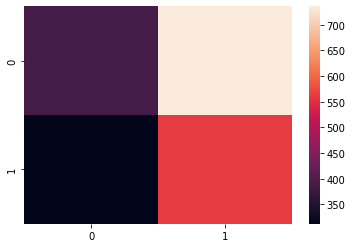

In [89]:
sns.heatmap(confusion_matrix(test['label'], y_pred))

In [91]:
print(recall_score(y_pred, test['label']))

0.4334103156274057


In [92]:
print(precision_score(y_pred, test['label']))

0.6434285714285715


In [93]:
sentiment_model.evaluate(test.text, test.label)

63/63 [==============================] - 20s 323ms/step - loss: 1.1549 - binary_accuracy: 0.4828


[1.154923677444458, 0.4827656149864197]

In [94]:
sentiment_model.save('./trained_model',save_format='h5')